In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 7)
os.chdir('/Users/Jonathan/citiBike_NYC')

In [2]:
# # Read data from citibikenyc website (https://www.citibikenyc.com/system-data)

# from zipfile import ZipFile
# from StringIO import StringIO
# import urllib2

# # Download all files for 2015
# months = [("%02d" % i) for i in range(1,12)]
# dfs = []
# for i in months:
#     url = "https://s3.amazonaws.com/tripdata/2015" +i + "-citibike-tripdata.zip"
#     print url    
#     r = urllib2.urlopen(url).read()
#     file = ZipFile(StringIO(r))
#     monthlyTripData = file.open("".join(["2015",i,"-citibike-tripdata.csv"]))
#     dfs.append(pd.read_csv(monthlyTripData))

In [3]:
# # Save all DFs
# import pickle

# with open('objs.pickle', 'w') as f:
#     pickle.dump([dfs], f)

In [4]:
# # Load all DFs
# import pickle

# with open('objs.pickle') as f:
#     dfs = pickle.load(f)

In [5]:
tripData = pd.read_csv('data/201511-citibike-tripdata.csv')
tripData.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1110,11/1/2015 00:00:00,11/1/2015 00:18:31,537,Lexington Ave & E 24 St,40.740259,-73.984092,531,Forsyth St & Broome St,40.718939,-73.992663,22545,Subscriber,1981,2
1,1094,11/1/2015 00:00:01,11/1/2015 00:18:15,537,Lexington Ave & E 24 St,40.740259,-73.984092,531,Forsyth St & Broome St,40.718939,-73.992663,23959,Subscriber,1980,1
2,520,11/1/2015 00:00:05,11/1/2015 00:08:45,536,1 Ave & E 30 St,40.741444,-73.975361,498,Broadway & W 32 St,40.748549,-73.988084,22251,Subscriber,1988,1
3,753,11/1/2015 00:00:15,11/1/2015 00:12:48,229,Great Jones St,40.727434,-73.993790,328,Watts St & Greenwich St,40.724055,-74.009660,15869,Subscriber,1981,1
4,353,11/1/2015 00:00:22,11/1/2015 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,151,Cleveland Pl & Spring St,40.722104,-73.997249,21645,Subscriber,1987,1


In [6]:
tripData.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [7]:
tripData.shape

(987245, 15)

In [8]:
# Parse dates
from datetime import datetime

a = tripData.starttime[0]
print a
datetime.now()
#datetime.strptime(a,'%m/%d/%Y')
#datetime.datetime(2010,1,1,0,0)
b = datetime.strptime(a,"%m/%d/%Y %H:%M:%S")
b

11/1/2015 00:00:00


datetime.datetime(2015, 11, 1, 0, 0)

In [9]:
dates = [datetime.strptime(x,"%m/%d/%Y %H:%M:%S") for x in tripData.starttime]
dates[:10]
# can also use:
# from dateutil.parser import parse
# [parse(x) for x in data.starttime]

[datetime.datetime(2015, 11, 1, 0, 0),
 datetime.datetime(2015, 11, 1, 0, 0, 1),
 datetime.datetime(2015, 11, 1, 0, 0, 5),
 datetime.datetime(2015, 11, 1, 0, 0, 15),
 datetime.datetime(2015, 11, 1, 0, 0, 22),
 datetime.datetime(2015, 11, 1, 0, 0, 22),
 datetime.datetime(2015, 11, 1, 0, 0, 25),
 datetime.datetime(2015, 11, 1, 0, 0, 28),
 datetime.datetime(2015, 11, 1, 0, 0, 37),
 datetime.datetime(2015, 11, 1, 0, 0, 42)]

In [10]:
# from dateutil.parser import parse
# new = pd.Series(np.random.randn(100), index = pd.date_range(parse(data.starttime[0]),periods = 100))
# new.plot()

In [11]:
data = tripData.ix[:99,:]

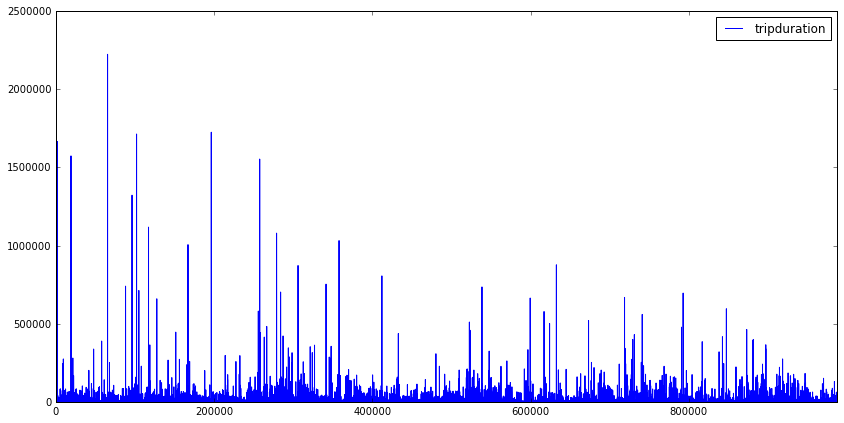

In [12]:
df = pd.DataFrame(tripData.tripduration)
df.set_index(pd.DatetimeIndex(tripData['starttime']))
df.plot()